# Les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')


import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings('ignore')

# Importation et chargement des données

In [2]:
# Définir une fonction qui nous permet de définir
# le chemin pour la lecture des données
def collect_data(path, fillname):
    data = pd.read_csv(path + "/" + fillname)
    return data

In [3]:
# Lecture des données
path = r"C:\DATA_PROJETS_PERSO\Udemy\Projet_1_udemy"
fillname = "googleplaystore.csv"
data = collect_data(path, fillname)
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Obtenir un aperçu des données

In [4]:
def get_stats(data):
    print(data.info())
    print("\n")
    print("La longueur du dataframe est {}".format(data.shape))
    print("\n")
    print("Les valeurs manquantes sont:")
    print(data.isnull().sum())
    print("\n")
    print("Les types de variables sont:")
    print(data.dtypes)

In [5]:
get_stats(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


La longueur du dataframe est (10841, 13)


Les valeurs manquantes sont:
App                  0
Category             0
Rating            1474
Reviews        

### Effectuer la caractérisation sur les données

Intéressons nous au variable "Rating" qui correspond à la note d'évaluation

In [6]:
data["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

On voit qu les notes varient de 1 à 19, nous pouvons les vérifier

In [7]:
# Vérification des lignes où la note d'évaluation est inférieur à zéro
data[data["Rating"]<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [8]:
# Vérification des lignes où la note d'évaluation est supérieur à cinq
data[data["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Normalement les notes doivent varier de 0 à 5 mais on voit une exception de note qui va jusqu'à 19 ce qui attire notre attention sur valeur. Il s'agit bien d'un outlier

In [9]:
data.iloc[10472,1:].shift(1)

Category                        NaN
Rating                          1.9
Reviews                        19.0
Size                           3.0M
Installs                     1,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                          NaN
Last Updated      February 11, 2018
Current Ver                  1.0.19
Android Ver              4.0 and up
Name: 10472, dtype: object

In [10]:
# Déplacer les données vers la droite pour que chaque valeur correspond à sa colonne
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)

In [11]:
# Vérification de la variable 
data["Rating"].dtype

dtype('O')

### Feature Engineering

Pour donner plus d'importance à certaines de nos variables et de l'est convertir au bon format que ça soit par année, en mois

In [12]:
# Conversion des variables
data["Last Updated"] = pd.to_datetime(data["Last Updated"])

In [13]:
# Vérification
data["Last Updated"].dtype

dtype('<M8[ns]')

In [14]:
# Conversion en année
data["year_added"] = data["Last Updated"].dt.year

In [15]:
# Conversion par mois
data["month_added"] = data["Last Updated"].dt.month

In [16]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


# Analyse exploratoire des données

In [17]:
# Verification du nombre de valeurs manquantes
data["Type"].isnull().sum()

1

On voit qu'on a une seule valeur manquante, dans ce cas on pourra supprimer au lieu de la garder avec la fonction drpna

In [18]:
# Suppression de la valeur manquante
data.dropna(subset = ["Type"], inplace = True)

In [19]:
# # Verification du nombre de valeurs manquantes apreès supression
data["Type"].isnull().sum()

0

In [20]:
# Renvoie les valeurs uniques dans la varible
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [21]:
# Le nombre de valeurs uniques dans la variable "Type" 
#data["Type"].value_counts().index()
#data["Type"].value_counts().values
data["Type"].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [22]:
# Le nombre de valeurs uniques dans la variable "Type" 
data["Type"].value_counts(normalize = True)

Free    0.926199
Paid    0.073801
Name: Type, dtype: float64

On voit que 800 des applications de googleplaystore soit 7% sont payantes contre 10040 soit 92% qui ne sont pas payantes c'est à dire gratuite.

Ensuite faisons une représentation graphique de cette variables avec plotly.express

In [23]:
labels = data["Type"].value_counts().index
values = data["Type"].value_counts().values

In [24]:
px.pie(names = labels, values = values)

On peut aussi faire un système de filtration de cette variable en les appelant df1 pour les applications de "Type" gratuites et df2 de "Type" payantes

In [25]:
df1 = data[data["Type"] == "Free"]
df2 = data[data["Type"] == "Paid"]

In [26]:
# Affichage des deux première lignes des applications de types gratuites
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [27]:
# Affichage des deux première lignes des applications de types payantes
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4


In [28]:
# Le nombre de valeurs uniques dans la variable "year_added"
# reset_index() pour obtenir un dataframe
free = df1["year_added"].value_counts().reset_index()
free 

,index,year_added
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [29]:
# Renommons les colonnes
free.columns = ["year", "count"]
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [30]:
# Le nombre de valeurs uniques dans la variable "year_added"
# reset_index() pour obtenir un dataframe
paid = df2["year_added"].value_counts().reset_index()
paid

,index,year_added
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [31]:
# Renommons les colonnes
paid.columns = ["year", "count"]
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


D'après l'affichage de ces deux types d'applications payantes ou gratuites, on voit en 2010 qu'il y'avait une application qui était gratuite, par contre on remarque l'absence de cette année pour les applications payantes.

Dans ce cas , comme les dataframes sont sous forme de dictionnaire , ou pourra créer l'année 2010 sur les applications payantes

In [32]:
# Création d'un dictionnaire
row = {"year" : 2010, "count" : 0}

In [33]:
# Ajout de cette ligne
paid.append(row, ignore_index=True)

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


### Visualisation de free et paid

In [34]:
free_plot = go.Scatter(x = free["year"], y = free["count"])
paid_plot = go.Scatter(x = paid["year"], y = paid["count"])

In [35]:
y = [free_plot, paid_plot]

In [36]:
layout = {
    "title" : "Application mise à jour ou ajoutée au fil des ans",
    "xaxis" : {"title": "years"}
}

In [37]:
fig = go.Figure(data = y, layout = layout)
iplot(fig)

Interprétation:
On pourra voir qu'en 2010 il y'avait pas d'applications payantes par rapport aux applications gratuites, c'est à partir de 2011 qu'on commence à avoir des applications payantes.
Comme il y'a de la concurence , à partir de 2016 qu'on voit encore le nombre d'application gratuites augmentent de plus jusqu'à 7000 en 2018(dépasse 20 fois le nombre d'applications payantes)

On peut dire les gens aiment beaucoup tout ce qui est gratuit au contraire du payement.

### Automatiser ces étapes précèdentes

In [38]:
# Création d'une fonction 
def stats(dataframe, feature, column1, column2):
    df = dataframe[feature].value_counts().reset_index()
    df.columns = [column1, column2]
    return df

In [39]:
# Appelle à la fonction pour free
stats(df1, "year_added", "year", "count")

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [40]:
# Appelle à la fonction pour paid
stats(df2, "year_added", "year", "count")

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [41]:
# Création d'une fonction pour la visualisation
def need_visual(df1=None, df2=None, column1=None, column2=None, dict_title=None, visual="scatter"):
    if visual == "scatter":
        free_plot = go.Scatter(x = df1[column1], y = df1[column2])
        paid_plot = go.Scatter(x = df2[column1], y = df2[column2])
        y = [free_plot, paid_plot]
        layout = dict_title
        fig = go.Figure(data = y, layout = layout)
        return iplot(fig)
    elif visual == "bar":
        return px.bar(df1, x= column1, y= column2)

In [42]:
free = stats(df1, "year_added", "year", "count")
paid = stats(df2, "year_added", "year", "count")

In [43]:
# Création d'un dictionnaire
row = {"year" : 2010, "count" : 0}

In [44]:
# Ajout de cette ligne
paid = paid.append(row, ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


#### Pour les années

In [45]:
need_visual(free, paid,"year","count",dict_title={"title":"Application mise à jour ou ajoutée au fil des ans","xaxis" : {"title": "years"}})

#### pour les mois

In [46]:
# Appel à la fonction 
free_month = stats(df1, "month_added", "month", "count")
paid_month = stats(df2, "month_added", "month", "count")

In [47]:
# Fonction groupby pour obtenir comme sorti l'ordre par mois
df1.groupby("month_added")["month_added"].count()

month_added
1      444
2      489
3      595
4      553
5      897
6     1179
7     3022
8     1511
9      283
10     357
11     347
12     363
Name: month_added, dtype: int64

In [48]:
# Fonction groupby et agg pour obtenir comme sorti l'ordre par mois
# mais au lieu d'une série comme sorti avec groupby
# On obtient un dataframe mais les deux sont similaires
df1.groupby("month_added").agg({"month_added": "count"})

,month_added
month_added,
1,444
2,489
3,595
4,553
5,897
6,1179
7,3022
8,1511
9,283


In [49]:
# Application gratuites
need_visual(df1 = free_month, column1= "month", column2="count", visual= "bar")

In [50]:
# Applications payantes
need_visual(df1 = paid_month, column1= "month", column2="count", visual= "bar")

* Intéressons nous maintenant au variable "Content Rating" pour voir si Google privilègie les applications gratuites ou payantes

In [51]:
df1["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [52]:
# Applications gratuites
df1["Content Rating"].value_counts()

Everyone           8020
Teen               1156
Mature 17+          479
Everyone 10+        380
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [53]:
# Application payants
df2["Content Rating"].value_counts()

Everyone        695
Teen             52
Everyone 10+     33
Mature 17+       20
Name: Content Rating, dtype: int64

In [54]:
# Appel à la fonction
free_users = stats(df1, "Content Rating", "users", "count")
paid_users = stats(df2, "Content Rating", "users", "count")

In [55]:
# Visualisation
need_visual(free_users, paid_users, "users", "count")

On peut dire que privilégie les applications gratuites parcequ'on a pas de choix pour ces applications par rapport aux applications payantes qui ne sont pas nombreuses avec des internautes limités.

*  Interessons à l'analyse de la distribution des notes avec la variables "Rating"

In [56]:
# Les valeurs uniques dans la variable
df1["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.6, 2.2, 1.7, 2.0, 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [57]:
# Les valeurs uniques dans la variable
df2["Rating"].unique()

array([4.7, 4.8, 4.0, 4.2, 2.6, nan, 3.5, 4.9, 4.6, 4.1, 4.4, 4.5, 4.3,
       3.0, 3.9, 3.2, 3.8, 2.5, 5.0, 3.4, 3.6, 1.0, 1.8, 3.3, 3.7, 2.9,
       2.8, 2.7, 2.4, 3.1, 1.7, 2.0, 2.3], dtype=object)

In [58]:
# Le type de variable
df1["Rating"].dtype

dtype('O')

Après vérification de la variable, on voit que la variable est de type "objet" ce qui est anormale parceque il s'agit des notes d'évaluation , normalement on doit avoir des variables de type "float" mais cette incidence est du à l'une des valeurs qui devait être "1.9" au lieu de " '1.9' " si vous regardez avec df1["Rating"].unique()

In [59]:
# correction
df1["Rating"].replace("1.9", 1.9, inplace=True)

In [60]:
# Vérification
df1["Rating"].dtype

dtype('float64')

In [61]:
# Vérification des valeurs manquantes
df1["Rating"].isnull().sum()

1320

Donc vous verrez qu'il y a autant de valeurs manquantes dans la fonction d'écriture, donc ce que je vais faire, c'est ignorer toutes les valeurs manquantes, pour ajuster l'histogramme.

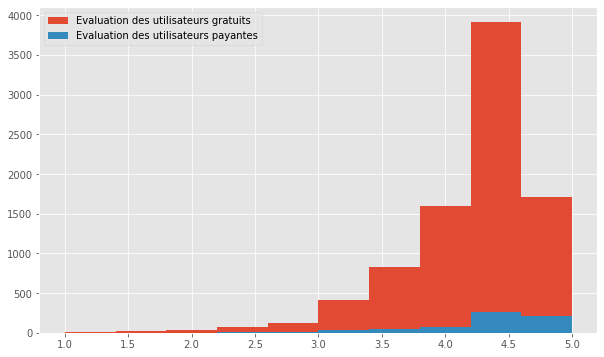

In [62]:
# Visualisation
plt.figure(figsize=(10,6)) 
plt.hist(df1["Rating"].dropna(), label = "Evaluation des utilisateurs gratuits")
plt.hist(df2["Rating"].dropna(), label = "Evaluation des utilisateurs payantes")
plt.legend()

On voit que les utilisaturs des applications gratuites prennent plus le temps à évaluer les applications par rapport au applications payantes, ce qui confirme que google privilège les applications gratuites. De plus on a atteint un pic à 4.5 qui n'est pas mauvaise pour noter des applications qui varient entre un intervalle de 1.0 à 5.0.

In [63]:
# Appel à la fonction pour mieurx voir les notes d'évaluation
stats(df1, "Rating", 'ratings', "count")

,ratings,count
0,4.4,1031
1,4.3,1025
2,4.5,965
3,4.2,890
4,4.6,741
5,4.1,676
6,4.0,546
7,4.7,446
8,3.9,370
9,3.8,282


In [64]:
# Appel à la fonction pour mieurx voir les notes d'évaluation
stats(df2, "Rating", 'ratings', "count")

,ratings,count
0,4.6,82
1,4.4,78
2,4.5,73
3,4.2,62
4,4.7,53
5,4.3,51
6,4.8,39
7,4.1,32
8,5.0,28
9,4.0,22


*  Interessons nous à l'analyse des différentes catégories d'applications avec la variable "Catégory"

In [65]:
# # Les valeurs uniques dans la variable
df1["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [66]:
# # Les valeurs uniques dans la variable
df2["Category"].unique()

array(['BUSINESS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'GAME',
       'FAMILY', 'MEDICAL', 'PHOTOGRAPHY', 'SPORTS', 'PERSONALIZATION',
       'PRODUCTIVITY', 'WEATHER', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'LIFESTYLE', 'AUTO_AND_VEHICLES', 'NEWS_AND_MAGAZINES', 'SHOPPING',
       'BOOKS_AND_REFERENCE', 'SOCIAL', 'ART_AND_DESIGN', 'VIDEO_PLAYERS',
       'FINANCE', 'MAPS_AND_NAVIGATION', 'PARENTING',
       'LIBRARIES_AND_DEMO', 'EVENTS'], dtype=object)

In [67]:
# Appel à la fonction pour mieurx voir les notes d'évaluation
free_cat = stats(df1, "Category", 'categories', "count")
paid_cat = stats(df2, "Category", 'categories', "count")

In [68]:
# Visualisation
need_visual(free_cat, paid_cat, "categories", "count")

In [69]:
# Visualisation catégories Applications payantes
#need_visual(df2 = paid_cat, column1="categories", column2="count", visual= "bar")

# Pour sortir la catégories par ordre alphabétique comme dans le dataframe
# Dans ce cas on aurra un graphe beaucoup plus présentatif que ceux au dessus
# free_cat = stats(df1, "Category", 'categories', "count").sort_values(by = "categories")

In [70]:
# # Visualisation à nouveau
free_catn = stats(df1, "Category", 'categories', "count").sort_values(by = "categories")
paid_catn = stats(df2, "Category", 'categories', "count").sort_values(by = "categories")

need_visual(free_catn, paid_catn, "categories", "count")

In [71]:
# Visualisation catégories Applications gratuites
need_visual(df1 = free_cat, column1= "categories", column2="count", visual= "bar")

In [72]:
# Visualisation catégories Applications payantes
labels = df2["Category"].value_counts().index
values = df2["Category"].value_counts().values

# Visualisation catégories Applications payantes
px.pie(names = labels, values = values)

*  Insteressons nous maintenant à la Version d'Android avec la variable "Android Ver" et  l'installation des applications avec la variable "Installs"

In [73]:
# Version d'android pour les applications gratuites
free_android = stats(df1, "Android Ver", "Android_versions", "Total_apps").sort_values(by = "Android_versions")
free_android

,Android_versions,Total_apps
27,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
26,2.0.1 and up,2
12,2.1 and up,107
31,2.2 - 7.1.1,1
11,2.2 and up,195
5,2.3 and up,580
8,2.3.3 and up,251


In [74]:
# Visualisation de la version d'android avec les Applications gratuites
need_visual(df1 = free_android, column1= "Android_versions", column2="Total_apps", visual= "bar")

In [75]:
# Version d'android pour les Applications payantes
paid_android = stats(df2, "Android Ver", "Android_versions", "Total_apps").sort_values(by = "Android_versions")
paid_android

,Android_versions,Total_apps
16,1.5 and up,6
7,1.6 and up,39
17,2.0 and up,6
18,2.0.1 and up,5
11,2.1 and up,27
5,2.2 and up,49
3,2.3 and up,72
10,2.3.3 and up,30
8,3.0 and up,34
23,3.1 and up,1


In [76]:
# Visualisation de la version d'android avec les Applications payantes
labels = df2["Android Ver"].value_counts().index
values = df2["Android Ver"].value_counts().values

# Visualisation de la version d'android avec les Applications payantes
px.pie(names = labels, values = values)

In [77]:
# Visualisation de la version d'android avec les Applications gratuites et payantes
need_visual(free_android, paid_android, "Android_versions", "Total_apps")

In [78]:
# Installation des applications gratuites
#free_installs = stats(df1, "Installs", "Total_installs", "count").sort_values(by="Total_installs")
free_installs = stats(df1, "Installs", "Total_installs", "count")
free_installs

,Total_installs,count
0,"1,000,000+",1555
1,"10,000,000+",1249
2,"100,000+",1079
3,"10,000+",925
4,"1,000+",759
5,"5,000,000+",752
6,100+,623
7,"500,000+",527
8,"50,000+",436
9,"5,000+",410


In [79]:
# Visualisation des installations avec les Applications gratuites
need_visual(df1 = free_installs, column1= "Total_installs", column2="count", visual= "bar")

In [80]:
# Installation des applications payantes
paid_installs = stats(df2, "Installs", "Total_installs", "count")
paid_installs

,Total_installs,count
0,"1,000+",149
1,"10,000+",129
2,100+,96
3,"100,000+",90
4,10+,70
5,"5,000+",67
6,"50,000+",43
7,500+,40
8,50+,34
9,"1,000,000+",24


In [81]:
# Visualisation des installations avec les Applications payantes
labels = df2["Installs"].value_counts().index
values = df2["Installs"].value_counts().values

# Visualisation des installations avec les Applications payantes
px.pie(names = labels, values = values)

In [82]:
# Visualisation des installations avec les Applications gratuites et payantes
need_visual(free_installs, paid_installs, "Total_installs", "count")

On peut voir des applictions qui franchisent les 1 miliard d'installation avec les applications gratuites, ça peut être que les applications qui ont beaucoup d'influence comme les whatsApp, Instagram, Facebook, YouTube etc...

# Nettoyage des données

In [83]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8


In [84]:
# Les types de donéées
data.dtypes

App                       object
Category                  object
Rating                    object
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

On voit qu'il y'a des variables qui sont classées comme des variables catégorielles et ça ne devraient pas être le cas, donc nous allons essayer aussi de résoudre ce problème pour faire correspondre chaque variable avec ces valeurs rélles

### Variable Price

In [85]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [86]:
# convertir cette variable
# Affiche une erreur pour dire que impossible de convertir la chaîne en flottant'$4.99'
#data["Price"].astype(float)

In [87]:
# Filtration
#data[data["Price"]=='$4.99']

In [88]:
# Choisir une colonne avec son index
data["Price"][234]

'$4.99'

Celà s'explique comme si on a une base de données avec comme index li signe dollard ainsi de suite et pour y accéder aux autres faudra  '$4.99' correspondre [1:]

In [89]:
x = '$4.99'
x[1:]
float('4.99')

4.99

Nous allons maintenant définir une fonction pour résoudre ce problème

In [90]:
def remove_dollar(x):
    if x =="0":
        return 0
    else:
        return x [1:]

In [91]:
data["Price"][0]

'0'

In [92]:
# Vérifions le type
type(data["Price"][0])

str

In [93]:
data["Price"][234]

'$4.99'

In [94]:
# Appelle à la fonction
remove_dollar(data["Price"][0])

0

In [95]:
# Vérifions le type
type(remove_dollar(data["Price"][0]))

int

In [96]:
dataframe = data.copy()

In [97]:
data["Price"] = data["Price"].apply(remove_dollar)

In [98]:
data["Price"] = data["Price"].astype(float)

In [99]:
data["Price"].dtype

dtype('float64')

### Variable Rating

In [100]:
data["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [101]:
# correction
data["Rating"].replace("1.9", 1.9, inplace=True)

In [102]:
data["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [103]:
data["Rating"].dtype

dtype('float64')

In [104]:
# Les types de donéées
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

### Variable Reviews

In [105]:
data["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [106]:
data["Reviews"] = data["Reviews"].astype(float)

In [107]:
data["Reviews"].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [108]:
data["Reviews"].dtype

dtype('float64')

Pour simplifier tous ces détail , nous allons créer une fonction qui va résumer toutes ces étapes

In [109]:
def convert_into_float(feature, df):
    print("Avant manipulation type de données de {} a été {}".format(feature,df[feature].dtype))
    df[feature]= df[feature].astype(float)
    print("Après manipulation type de données de {} est {}".format(feature,df[feature].dtype))

In [110]:
# Appelle à la fonction pour vérifier si ça fonctionne
convert_into_float("Reviews", data)

Avant manipulation type de données de Reviews a été float64
Après manipulation type de données de Reviews est float64


In [111]:
# Les types de donéées
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                      object
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

### Variable Installs

In [112]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [113]:
data["Installs"][0]

'10,000+'

In [114]:
data["Installs"][234]

'100,000+'

In [115]:
type(data["Installs"][0])

str

In [116]:
# Appelle à la fonction pour vérifier si ça fonctionne
#convert_into_float("Installs", data)

In [117]:
# correction
x = data["Installs"][0].replace(",", "")
x

'10000+'

In [118]:
type(int(x.replace("+", "")))

int

In [119]:
def clean_installs(x):
    x = x.replace(",", "")
    return int(x.replace("+", ""))

In [120]:
data["Installs"] = data["Installs"].apply(clean_installs)

In [121]:
data["Installs"].dtype

dtype('int64')

In [122]:
# Appelle à la fonction pour vérifier si ça fonctionne
#convert_into_float("Installs", data)

In [123]:
data["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [124]:
# Les types de donéées
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

### Variable Size 

In [125]:
# data["Size"].unique()
data["Size"].value_counts().reset_index()

,index,Size
0,Varies with device,1694
1,11M,198
2,12M,196
3,14M,194
4,13M,191
...,...,...
456,430k,1
457,429k,1
458,200k,1
459,460k,1


Ici nous avons trois choses à corriger:
*  D'abord enlever la chaine de caractère avec "Varies with device"
*  Ensuite on enlever les M pour les valeurs
*  Puis enlever ke K pour les valeurs parceque les algorithme de Machine Learning ne reconnaissent pas les chaines de caractères.
*  donc de toute façon, nous devons convertir ces variables en certaines en quelques mégaoctets, puis nous devons opter pour la valeur dans un format tel que mon algorithme pourra le faire de manière très proche, c'est ce que nous devons faire, c'est que nous devons convertir ceci en ceci mégaoctets en divisant essentiellement (1 MB = 1024 kB). 
    

In [126]:
# [0:-1] le -1 est exclu en python, ex: 619k le -1 correspnd à k
float(data["Size"][0][0:-1])

19.0

In [127]:
def convert_into_MB(x):
    if "M" in x:
        return float(x[0:-1])
    else:
        mb = float(x[0:-1])/1024
        mb = np.round(mb,2)
        return mb

In [128]:
# Appelle à la fonction
convert_into_MB("234k")

0.23

In [129]:
# Appliquer la fonction 
# data["Size"].apply(convert_into_MB)
# on obttient une erreur: "could not convert string to float: 'Varies with device'"

In [130]:
# Faire du filtre
#data[data["Size"] == 'Varies with device']

In [131]:
# Faire du filtre
filter = data["Size"] == 'Varies with device'
data_filter = data[~filter]
data_filter.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [132]:
data_filter["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10835    9.6M
10836     53M
10837    3.6M
10838    9.5M
10840     19M
Name: Size, Length: 9146, dtype: object

In [133]:
# data_filter["Size"].median()
# Affiche une erreur donc avant nous devons appeler la fonction
# pour l'appliquer

data_filter["Size"] = data_filter["Size"].apply(convert_into_MB)

In [134]:
data_filter["Size"].dtype

dtype('float64')

In [135]:
data_filter["Size"].median()

13.0

In [136]:
data["Size"].replace('Varies with device', "13M", inplace=True)

In [137]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '13M', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M',
       '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
     

In [138]:
data["Size"] = data["Size"].apply(convert_into_MB)

In [139]:
data["Size"].dtype

dtype('float64')

In [140]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [141]:
data.isnull().sum()

App                  0
Category             1
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
year_added           0
month_added          0
dtype: int64

In [142]:
# Afficher le pourcentage de valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

App               0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.000000
Last Updated      0.000000
year_added        0.000000
month_added       0.000000
Category          0.000092
Genres            0.000092
Android Ver       0.000185
Current Ver       0.000738
Rating            0.135886
dtype: float64

In [143]:
# Vérification
data.isnull().sum()

App                  0
Category             1
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
year_added           0
month_added          0
dtype: int64

In [144]:
# Suppessions des nan
new_df = data.dropna()

In [145]:
# Sélection des features importantes(variables indépendantes)
# ind_features = ["Reviews", "Size", "Installs", "Price"]
features = ["Reviews", "Size", "Installs", "Price"]

X = new_df[features]

# Variable cible (dépendante)
y = new_df["Rating"]

In [146]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9360, 4)
y shape: (9360,)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

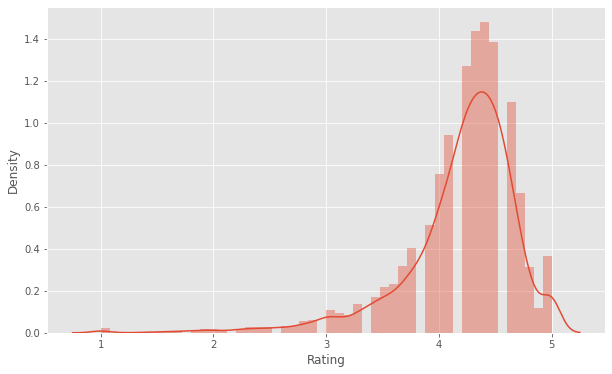

In [147]:
# Visualisation de la variable cible 
plt.figure(figsize=(10,6)) 
sb.distplot(y,kde = True)

Les classes du sklearn.feature_selectionmodule peuvent être utilisées pour la sélection de caractéristiques/la réduction de la dimensionnalité sur des ensembles d'échantillons, soit pour améliorer les scores de précision des estimateurs, soit pour augmenter leurs performances sur des ensembles de données de très grande dimension.

Nous allons Sélectionné les fonctionnalités en fonction des k scores les plus élevés avec sklearn.feature_selection.SelectKBest voir:

https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [148]:
#!pip install sklearn

In [149]:
from sklearn.feature_selection import SelectKBest, f_regression

# Tests de régression linéaire univariés renvoyant la statistique F et les valeurs p.
X_new = SelectKBest(f_regression, k=3).fit_transform(X,y)

In [150]:
X.head(5)

,Reviews,Size,Installs,Price
0,159.0,19.0,10000,0.0
1,967.0,14.0,500000,0.0
2,87510.0,8.7,5000000,0.0
3,215644.0,25.0,50000000,0.0
4,967.0,2.8,100000,0.0


In [151]:
X_new[0:5]

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       [2.15644e+05, 2.50000e+01, 5.00000e+07],
       [9.67000e+02, 2.80000e+00, 1.00000e+05]])

*  Vérifions la corrélation des différentes features avec la variable cible 
*  Le coefficient de Pearson est un indice reflétant une relation linéaire entre deux variables continues. Le coefficient de corrélation varie entre -1 et +1, 0 reflétant une relation nulle entre les deux variables, une valeur négative (corrélation négative) signifiant que lorsqu'une des variable augmente, l'autre diminue ; tandis qu'une valeur positive (corrélation positive) indique que les deux variables varient ensemble dans le même sens.

http://www.biostat.ulg.ac.be/pages/Site_r/corr_pearson.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

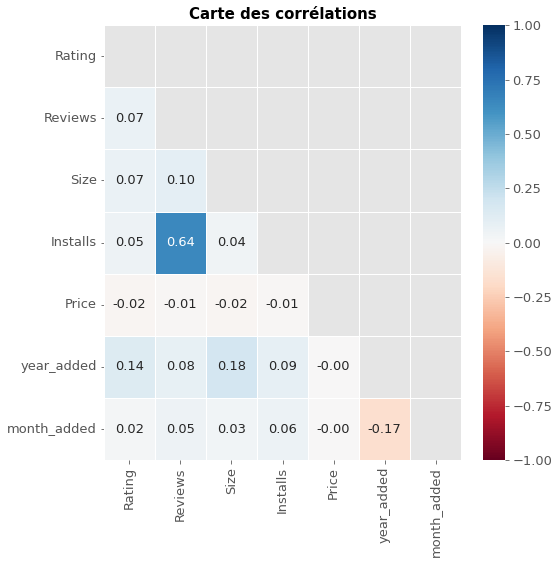

In [152]:
# Carte des corrélations

def plot_heatmap(df):
    cor_map = df.corr()
    plt.rcParams.update({ "font.size" : 13})
    plt.figure(figsize = (8, 8))
    mask = np.triu(np.ones_like(cor_map, dtype=bool))
    sb.heatmap(cor_map, mask=mask, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Carte des corrélations', fontsize=15, fontweight="bold")
    plt.show()

plot_heatmap(new_df)

In [153]:
"""
matrix = data.corr()

plt.figure(figsize=(15, 15))
sb.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()
"""

'\nmatrix = data.corr()\n\nplt.figure(figsize=(15, 15))\nsb.heatmap(matrix, square=True, annot=True, cmap="coolwarm")\nplt.title("Matrice de corrélation des variables quantitatives")\nplt.show()\n'

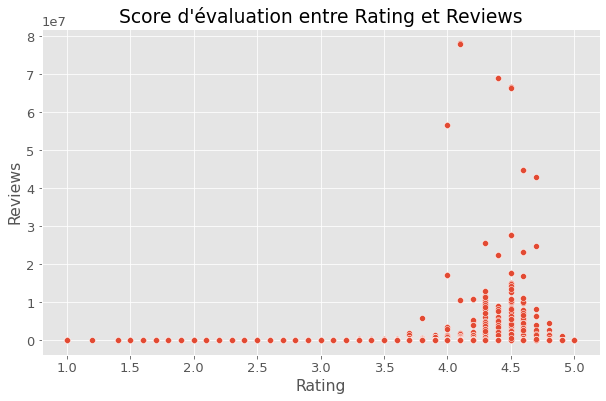

In [154]:
# Visualisation 

plt.figure(figsize=(10,6))
sb.scatterplot("Rating", "Reviews", data = new_df)
plt.title("Score d'évaluation entre Rating et Reviews")
plt.show()

On peut supposer qu'il n'y a pas de corrélation entre ces deux variables d'après la visualisation et on pourra verifié avec le test de Pearson

In [155]:
#! pip install scipy

In [156]:
# Test de Pearson
# H0: Pas de corrélation entre les deux variables : ρ = 0
# HA: Corrélation entre les deux variables : ρ ≠ 0 (p < 0.05)
# Si p < 0.05 dans ce cas on pourra rejeter l'hypothèse nulle et dans le cas contraire
# On ne pourra pas rejeter l'hypothèse nulle etb accepton l'hypothèse alternative

from scipy.stats.stats import pearsonr
from scipy import stats
# stats.pearsonr(data["Reviews"], data["Rating"])
pearsonr(new_df["Reviews"], new_df["Rating"])

(0.06813270883720679, 4.155367872052734e-11)

Le premier nombre correspond au coefficient de corrélation de pearson( statisque du test de pearson) et la deuxième valeur donne la p valeur associée à ce test. On remarque que le coefficient est égal à 0.06 ce qui confirme qu'il n' ya pas de corrélation entre ces deux vaiables( très faible). Le pvalue est inférieur à 0.05 ce qui veut dire qu'on peut rejeter l'hypothèse nulle selon laquelle les deux variable ne sont pas corrélées. 

On peut dire qu'il existe une relation significativement statistique entre ces variables mais la corélation reste quand même très très faible.

<Figure size 720x432 with 0 Axes>

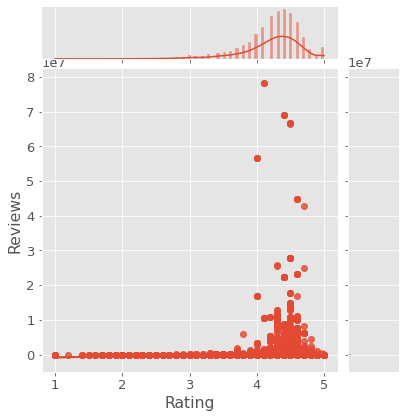

In [157]:
plt.figure(figsize=(10,6))
visual = sb.jointplot("Rating", "Reviews", data = new_df, kind = 'reg')
#visual.annotate(stats.pearsonr)
plt.show(visual)

### Test des normalités et d'homogénéité des variables

https://pingouin-stats.org/

conda install -c conda-forge pingouin

!pip install pingouin

In [158]:
import pingouin as pg

# Test de normalité
pg.normality(new_df, method='normaltest', alpha=0.05)

,W,pval,normal
Rating,3677.304534,0.000000e+00,False
Reviews,18093.781729,0.000000e+00,False
Size,2901.699904,0.000000e+00,False
Installs,13470.448991,0.000000e+00,False
Price,22221.271911,0.000000e+00,False
year_added,4504.929715,0.000000e+00,False
month_added,45.687808,1.199551e-10,False


On peut rejetter l'hypothèse de la distribution normale des variables

In [159]:
# Le choix s'est porté sur un test de Levene car il est plus efficace lorsque les distributions ne suivent pas une loi normale. 
# Dans le cas contraire, nous aurions utilisé un test de Bartlett.
# H0: les deux variables sont égales : ρ = 0
stats.levene(new_df["Reviews"], new_df["Rating"])

LeveneResult(statistic=249.6592940876159, pvalue=7.078621513693056e-56)

On voit qu'on a un pval < 0.05 donc on peut rejetter l'hypothède nulle d'égalité des variances

In [160]:
pg.homoscedasticity(new_df, method='levene', alpha=0.05)

,W,pval,equal_var
levene,355.064841,0.0,False


On voit qu'on a un pval = 0 donc on peut rejetter l'hypothède d'égalité des variances

In [161]:
# Nous voulons afficher le features, la corrélation et le pvalue pour 
# chacune de nos variables indépendante avec la variable cible

# Création d'une liste
out_list = []

for column in features:
    corr_list = pearsonr(new_df[column], new_df["Rating"])
    out_list.append([column, corr_list[0], corr_list[1]])

In [162]:
# afficher la liste
out_list

[['Reviews', 0.06813270883720679, 4.155367872052734e-11],
 ['Size', 0.06585466900267059, 1.8021360379615822e-10],
 ['Installs', 0.05133692709156859, 6.719094655481812e-07],
 ['Price', -0.021919498334990593, 0.033953854445535225]]

In [163]:
# Format dataframe
# pd.DataFrame(out_list)
#corr_df.sort_values(by = ["p_value"])
corr_df = pd.DataFrame(out_list,columns=["Features", "Correlation","p_value"])
corr_df

,Features,Correlation,p_value
0,Reviews,0.068133,4.155368e-11
1,Size,0.065855,1.802136e-10
2,Installs,0.051337,6.719095e-07
3,Price,-0.021919,3.395385e-02


On voit que la variable price a une faible corrélation par rapport aux autres varibles, donc on pourra la supprimer pour éviter de fausser notre modèle

In [164]:
# Suppression de Price
# data.drop("price", axis = 1, inplace = True)
data = data.drop(columns = ["Price"], axis = 1)

### Détection des outliers

In [165]:
data.corr()

,Rating,Reviews,Size,Installs,year_added,month_added
Rating,1.000000,0.068147,0.066286,0.051393,0.137317,0.018075
Reviews,0.068147,1.000000,0.104032,0.643122,0.075537,0.045946
Size,0.066286,0.104032,1.000000,0.047699,0.181947,0.028715
Installs,0.051393,0.643122,0.047699,1.000000,0.089368,0.056466
year_added,0.137317,0.075537,0.181947,0.089368,1.000000,-0.187359
month_added,0.018075,0.045946,0.028715,0.056466,-0.187359,1.000000


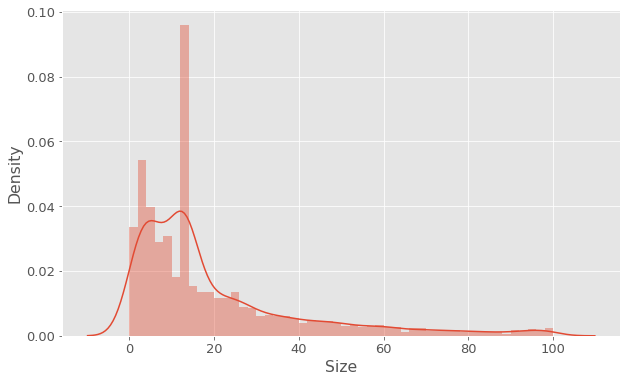

In [166]:
# Visualisation
plt.figure(figsize=(10,6))
sb.distplot(data["Size"])
plt.show()

On voit qu'on a une distribution assymetrique vers la droite ce qui correspond aux outliers et qu'on pourra bien voir avec un boxplot

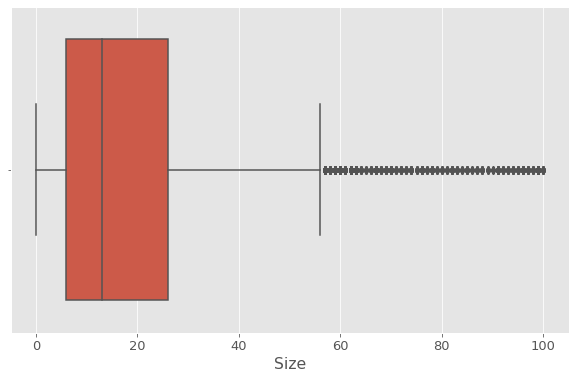

In [167]:
# Visualisation avec un boxplot
plt.figure(figsize=(10,6))
sb.boxplot(data["Size"])
plt.show()

In [168]:
# Création de nouvelle dataframe après nettoyage et coversion de
# certaines variables
df_free = data[data["Type"] == "Free"]
df_paid = data[data["Type"] == "Paid"]

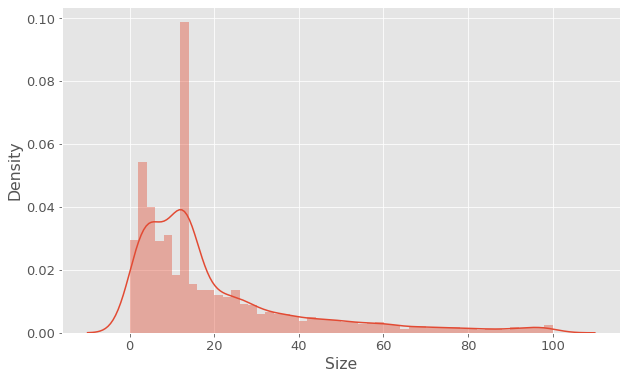

In [169]:
# Visualisation pour les applications gratuites
plt.figure(figsize=(10,6))
sb.distplot(df_free["Size"])
plt.show()

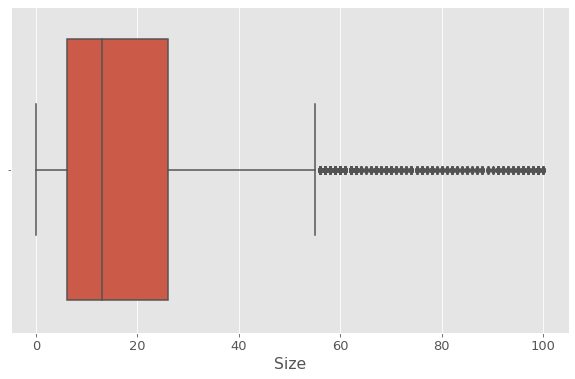

In [170]:
# Visualisation avec un boxplot pour les applications gratuites
plt.figure(figsize=(10,6))
sb.boxplot(df_free["Size"])
plt.show()

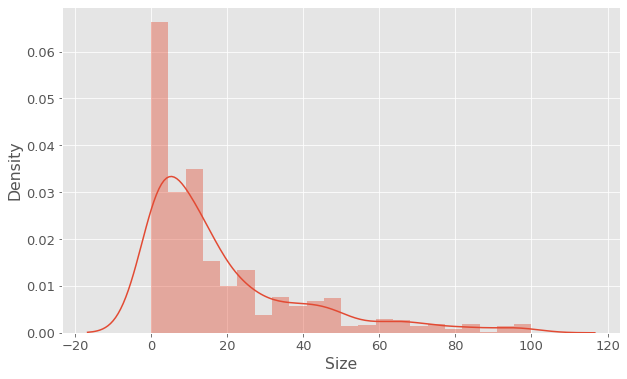

In [171]:
# Visualisation pour les applications payantes
plt.figure(figsize=(10,6))
sb.distplot(df_paid["Size"])
plt.show()

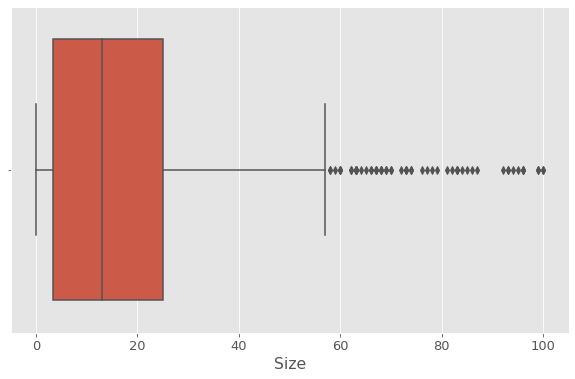

In [172]:
# Visualisation avec un boxplot pour les applications payantes
plt.figure(figsize=(10,6))
sb.boxplot(df_paid["Size"])
plt.show()

In [173]:
data.shape

(10840, 14)

In [174]:
# Fonction pour retirer les outliers
def remove_outliers_sd(df,feature):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("Type"):
        m = np.mean(subdf[feature])
        sd = np.mean(subdf[feature])
        reduced_df = subdf[(subdf[feature]>(m-sd)) & (subdf[feature]<=(m+sd))]
        
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out   

In [175]:
# Appelle à la fonction
new_data = remove_outliers_sd(data,"Size")
new_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [176]:
new_data.shape

(9271, 14)

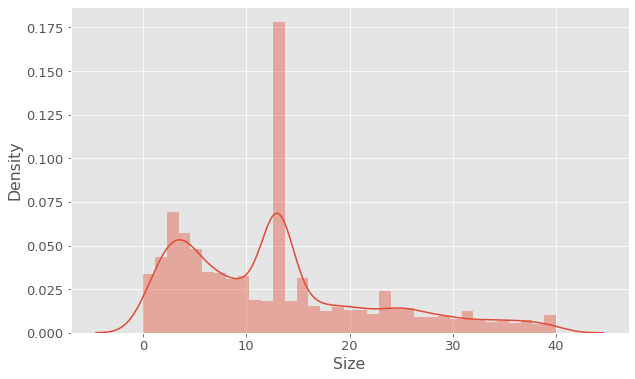

In [177]:
# Visualisation
plt.figure(figsize=(10,6))
sb.distplot(new_data["Size"])
plt.show()

Après visualisation , on voit très bien du changement au niveau du graphe parceque avant suppression des outliers , on avait les valeurs qui varient de 0 à 100 sur l'axe des abscisses mais après suppression on a les valeurs de 0 à 40, ce qui montre la suppression des outliers.

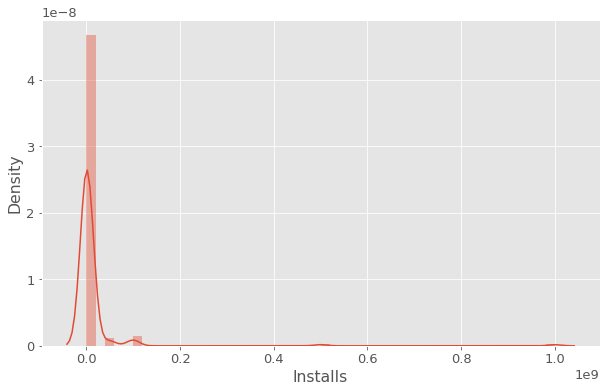

In [178]:
# Visualisation
plt.figure(figsize=(10,6))
sb.distplot(new_data["Installs"])
plt.show()

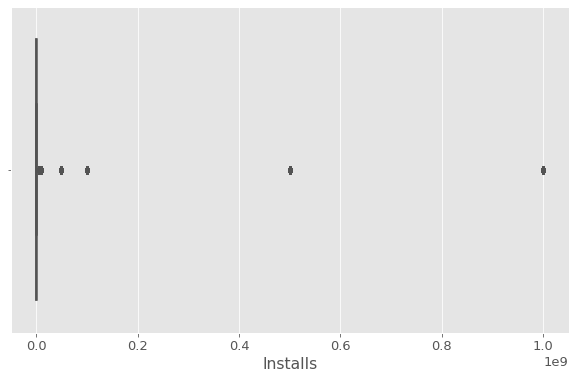

In [179]:
# Visualisation
plt.figure(figsize=(10,6))
sb.boxplot(new_data["Installs"])
plt.show()

In [180]:
# Autre methode pour détecter les outliers

Q1 = new_data["Installs"].quantile(0.25)
print( "Le premier quartile est:" ,Q1)
print("-----------------------------")
Q3 = new_data["Installs"].quantile(0.75)
print("Le deuxième quartile est:", Q3)
print("-----------------------------")
EIQ = Q3-Q1
print("L'interquartile est:", Q3-Q1)
print("-----------------------------")
LI = Q1 - (EIQ * 1.5)
print("La limite inférieure est:", LI)
print("-----------------------------")
LS = Q1 + (EIQ * 1.5)
print("La limite supérieure est:", LS)

Le premier quartile est: 1000.0
-----------------------------
Le deuxième quartile est: 1000000.0
-----------------------------
L'interquartile est: 999000.0
-----------------------------
La limite inférieure est: -1497500.0
-----------------------------
La limite supérieure est: 1499500.0


In [181]:
# Afficher la liste des outliers

outliers = []

# install se sont les éléments de sorties
# new_data["Installs"] les élémentsà parcourir
for install in new_data["Installs"]:
    if install > LS or install < LI:
        outliers.append(install)
    else:   
        continue

In [182]:
print(outliers)

[5000000, 50000000, 10000000, 5000000, 10000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 100000000, 10000000, 100000000, 10000000, 10000000, 10000000, 10000000, 1000000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 10000000, 10000000, 50000000, 10000000, 5000000, 50000000, 5000000, 100000000, 10000000, 5000000, 50000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 5000000, 5000000, 10000000, 5000000, 50000000, 5000000, 5000000, 10000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 5000000, 10000000, 10000000, 50000000, 100000000, 5000000, 10000000, 5000000, 5000000, 5000000, 1000000000, 1000000000, 10000000, 1000000000, 100000000, 1000000000, 1000000000, 500000000, 5000000, 100000000, 100000000, 100000000, 500000000, 50000000, 5000000, 5000000, 100000000, 10000000, 10000000, 10000000, 10000000, 100000000, 10000000, 5000000, 10

In [183]:
len(outliers)

2200

In [184]:
# Remplacer les valeurs abérantes par la mediane
for install in new_data["Installs"]:
    if install > LS or install < LI:
        new_data["Installs"] = new_data["Installs"].replace(install, np.median(new_data["Installs"]))
    else:
        continue

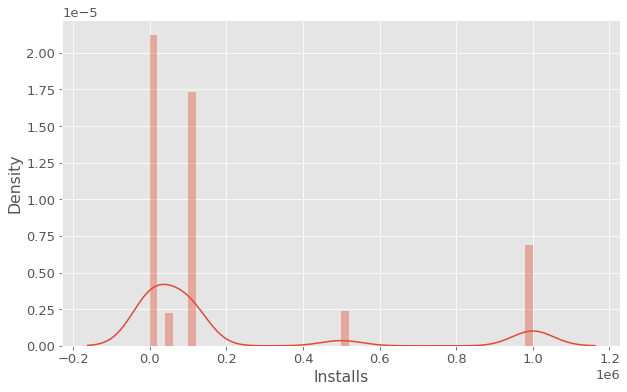

In [185]:
# Visualisation
plt.figure(figsize=(10,6))
sb.distplot(new_data["Installs"])
plt.show()

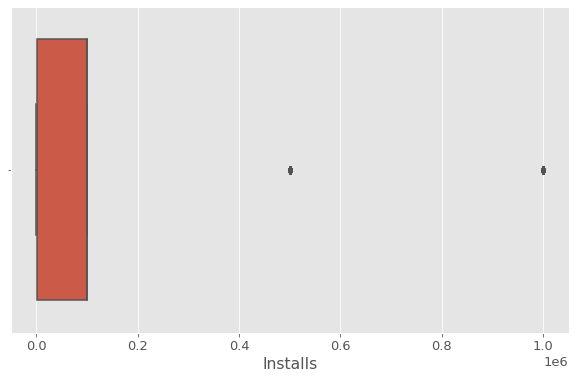

In [186]:
# Visualisation
plt.figure(figsize=(10,6))
sb.boxplot(new_data["Installs"])
plt.show()

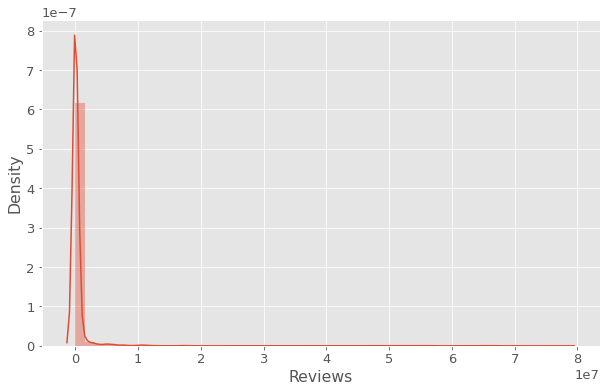

In [187]:
# Visualisation
plt.figure(figsize=(10,6))
sb.distplot(new_data["Reviews"])
plt.show()

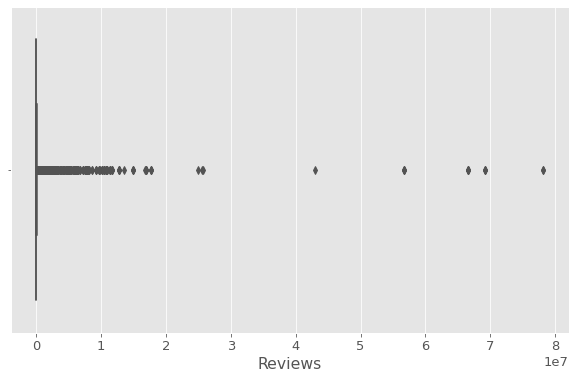

In [188]:
# Visualisation
plt.figure(figsize=(10,6))
sb.boxplot(new_data["Reviews"])
plt.show()

Nous avons donc des valeurs aberrantes de grande valeur, dans ce cas on pourra fixer un seuil pour dire que si celà dépasse le seuil on les suppriment sinon on les gardent et faire une imputation

In [189]:
print("La moyenne est:",new_data["Reviews"].mean())
print("-----------------------------")
print("L'écart type est:",new_data["Reviews"].std())
print("-----------------------------")
print("Le minimum est:",new_data["Reviews"].min())
print("-----------------------------")
print("Le maximum est:",new_data["Reviews"].max())
print("-----------------------------")
print("La mediane:",new_data["Reviews"].median())

La moyenne est: 350305.6526804012
-----------------------------
L'écart type est: 2744496.318010802
-----------------------------
Le minimum est: 0.0
-----------------------------
Le maximum est: 78158306.0
-----------------------------
La mediane: 1166.0


In [190]:
# Le seuil
threshold = 1e7

In [191]:
# Afficher les données où les les dépassent le seuil 
new_data[new_data["Reviews"] > threshold].shape

(58, 14)

On obteint 58 lignes(entrées) qui sont des outliers avec de très grands nombres. Utilisons numpy.where(condition, [x, y, ]/) qui renvoie des éléments choisis parmi x ou y selon la condition .

np.where voir : https://www.geeksforgeeks.org/numpy-where-in-python/

In [192]:
# Appelle à la fonction np.numpy
new_data["Reviews"] = np.where(new_data["Reviews"] > threshold,new_data["Reviews"].median(),new_data["Reviews"])

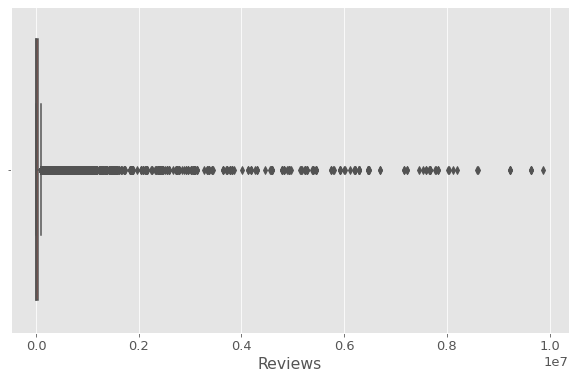

In [193]:
# Visualisation
plt.figure(figsize=(10,6))
sb.boxplot(new_data["Reviews"])
plt.show()

On voit un changement avec la suppression des grandes valeurs des outliers qui passent de 0 à 1e7 au lieu de 0 à 8e7

In [194]:
# Après suppression des grandes valeurs des outliers
print("La moyenne est:",new_data["Reviews"].mean())
print("-----------------------------")
print("L'écart type est:",new_data["Reviews"].std())
print("-----------------------------")
print("Le minimum est:",new_data["Reviews"].min())
print("-----------------------------")
print("Le maximum est:",new_data["Reviews"].max())
print("-----------------------------")
print("La mediane:",new_data["Reviews"].median())

La moyenne est: 194133.69809082084
-----------------------------
L'écart type est: 804802.8745276391
-----------------------------
Le minimum est: 0.0
-----------------------------
Le maximum est: 9879473.0
-----------------------------
La mediane: 1166.0


mais pour le moment, cette valeur  de la moyenne est presque la moitié de ce que nous avons au paravant et si je voulais visualiser cette distribution,

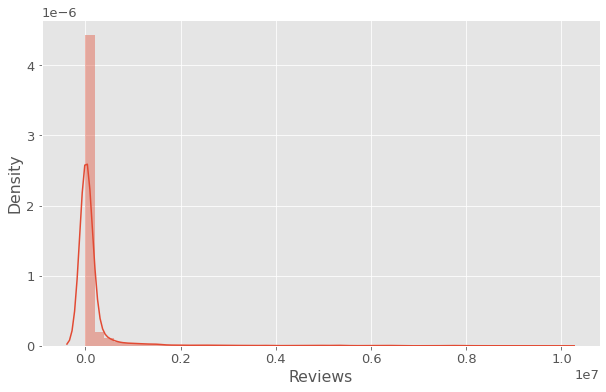

In [195]:
# Visualisation
plt.figure(figsize=(10,6))
sb.distplot(new_data["Reviews"])
plt.show()

Pour obtenir une distribution quasi normale et obtenir des résultats satisfaisantes , nous allons utiliser le logarithme pour combler cette vide qui se situe à droite avec la distribution.

Le logarithme népérien logest l'inverse de la fonction exponentielle, de sorte que log(exp(x)) = x

log1p est l’inverse de exp (x) – 1 .

In [196]:
# Application du logarithme
new_data["Reviews"] = np.log1p(new_data["Reviews"])

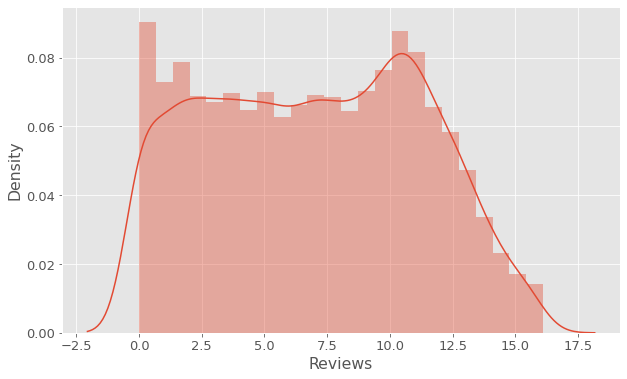

In [197]:
# Visualisation
plt.figure(figsize=(10,6))
sb.distplot(new_data["Reviews"])
plt.show()

### Choix de la suppression des valeurs manquantes

In [198]:
new_data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [199]:
# Afficher le pourcentage de valeurs manquantes
(new_data.isna().sum()/new_data.shape[0]).sort_values(ascending=True)

App               0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Content Rating    0.000000
Last Updated      0.000000
year_added        0.000000
month_added       0.000000
Category          0.000108
Genres            0.000108
Android Ver       0.000216
Current Ver       0.000863
Rating            0.150361
dtype: float64

In [200]:
new_data["Rating"].isnull().sum()

1394

*  Si une colonne contient moins de 5% de valeurs manquantes, nous supprimons ces valeurs manquantes ;
*  Si une colonne contient au moins 80% de valeurs manquantes, nous supprimons cette colonne
*  Pour le reste des colonnes, nous ferons des imputations.

In [201]:
# [col for col in data.columns.to_list() if (data[col].isna().sum() / data.shape[0] > 0 and data[col].isna().sum() / data.shape[0] <= 0.05)]

On voit que certaines des colonnes ont des valeurs manquantes inférieures à 5% dans ce cas on pourra les supprimer

In [202]:
#data = data.dropna(
#    subset = [col for col in data.columns.to_list() if (data[col].isna().sum() / data.shape[0] > 0 and data[col].isna().sum() / data.shape[0] <= 0.05)])

In [203]:
#[col for col in data.columns.to_list() if (data[col].isna().sum() / data.shape[0] >= 0.8)]

Pour le reste on fait une imputation par la mediane

In [204]:
# Imputation par la mediane
#data["Rating"] = data["Rating"].median()

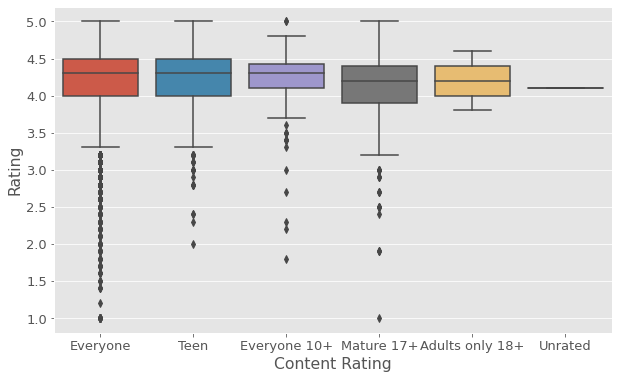

In [205]:
# Visualisation
plt.figure(figsize=(10,6))
sb.boxplot(x = "Content Rating", y = "Rating", showfliers = True, data = new_data)
plt.show()

In [206]:
# La mediane
new_data.groupby("Content Rating")["Rating"].median()

Content Rating
Adults only 18+    4.2
Everyone           4.3
Everyone 10+       4.3
Mature 17+         4.2
Teen               4.3
Unrated            4.1
Name: Rating, dtype: float64

In [207]:
# La moyenne 
new_data.groupby("Content Rating")["Rating"].mean()

Content Rating
Adults only 18+    4.200000
Everyone           4.179351
Everyone 10+       4.213258
Mature 17+         4.103467
Teen               4.212516
Unrated            4.100000
Name: Rating, dtype: float64

In [208]:
# Définissions une fonction pour faire l'imputation par la moyenne

def impute_Rating(cols):
    Rating = cols[0]
    Content_rating = cols[1]
    
    if pd.isnull(Rating):
        if Content_rating == "Adults only 18+":
            return 4.2
        elif Content_rating == "Everyone":
            return 4.17
        elif Content_rating == "Everyone 10+":
            return 4.21
        elif Content_rating == "Mature 17+":
            return 4.1
        elif Content_rating == "Teen":
            return 4.21
        elif Content_rating == "Unrated":
            return 4.1
        else : 
            4.10
    else:
        return Rating

In [209]:
# Appelle à la fonction
new_data["Rating"] = new_data[["Rating", "Content Rating"]].apply(impute_Rating, axis = 1)

In [210]:
# Vérification
new_data["Rating"].isnull().sum()

0

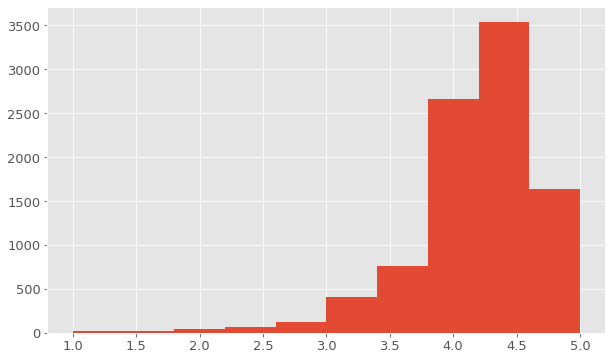

In [211]:
# Visualisation
plt.figure(figsize=(10,6))
new_data["Rating"].hist()
plt.show()

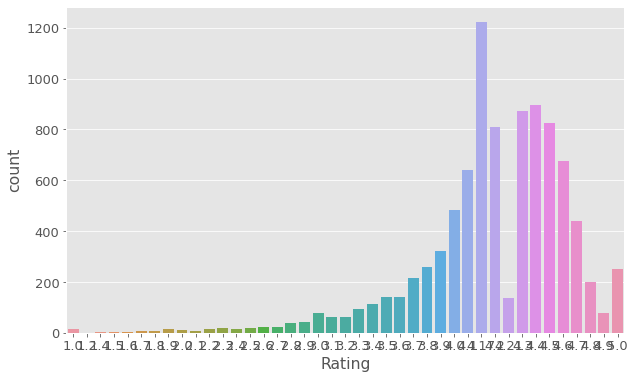

In [212]:
# Visualisation
plt.figure(figsize=(10,6))
sb.countplot(new_data["Rating"])
plt.show()

On voit que notre variable cible ne suit pas une distribution normale, ce qui n'est pas favorisé par les algorithmes de Machine Learning car ça pourra faussé les résultats, dans ce cas pour notre variable cible suit une loi normale nous allons corriger sous forme d'intervalle pour ne pas obtenir de valeurs continues.

In [213]:
# Création d'une fonction pour convertir ces valeurs
# sur l'axe des abcisses

def convert(x):
    if x > 0.0 and x <=1.5:
        return 1
    elif x > 1.5 and x <=2.5:
        return 2
    elif x > 2.5 and x <=3.5:
        return 3
    elif x > 3.5 and x <=4.5:
        return 4
    else:
        return 5

In [214]:
# Appelle à la fonction
new_data["Rating"] = new_data["Rating"].apply(convert)

In [215]:
# Afficher les données
new_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,5.075174,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,4,6.875232,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


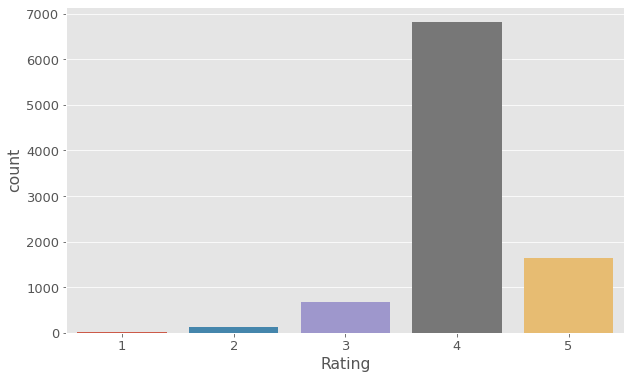

In [216]:
# Visualisation après correction
plt.figure(figsize=(10,6))
sb.countplot(new_data["Rating"])
plt.show()

### Encodage des variables

*  Les algorithmes de Machine Learning ne reconnaissent pas les chaines de caractères, dans ce cas il faudra convertir ces variables catégorielles en variables quantitatives( numériques)

In [217]:
new_data.dtypes

App                       object
Category                  object
Rating                     int64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [218]:
df_final = new_data.copy()

In [219]:
df_final.groupby("Category")["Rating"].mean().to_dict()

{'ART_AND_DESIGN': 4.3076923076923075,
 'AUTO_AND_VEHICLES': 4.157894736842105,
 'BEAUTY': 4.2,
 'BOOKS_AND_REFERENCE': 4.224770642201835,
 'BUSINESS': 4.0162790697674415,
 'COMICS': 4.033333333333333,
 'COMMUNICATION': 3.9894459102902373,
 'DATING': 3.890909090909091,
 'EDUCATION': 4.316546762589928,
 'ENTERTAINMENT': 4.022058823529412,
 'EVENTS': 4.258064516129032,
 'FAMILY': 4.077556623198353,
 'FINANCE': 4.04179104477612,
 'FOOD_AND_DRINK': 4.123893805309734,
 'GAME': 4.140157480314961,
 'HEALTH_AND_FITNESS': 4.178321678321678,
 'HOUSE_AND_HOME': 4.095238095238095,
 'LIBRARIES_AND_DEMO': 4.075,
 'LIFESTYLE': 4.063888888888889,
 'MAPS_AND_NAVIGATION': 3.928,
 'MEDICAL': 4.093975903614457,
 'NEWS_AND_MAGAZINES': 4.0321428571428575,
 'PARENTING': 4.26,
 'PERSONALIZATION': 4.162234042553192,
 'PHOTOGRAPHY': 4.03,
 'PRODUCTIVITY': 4.0945273631840795,
 'SHOPPING': 4.128514056224899,
 'SOCIAL': 4.100371747211896,
 'SPORTS': 4.078078078078078,
 'TOOLS': 3.966060606060606,
 'TRAVEL_AND_LOCA

In [220]:
df_final.groupby("Category")["Rating"].mean().reset_index()

,Category,Rating
0,ART_AND_DESIGN,4.307692
1,AUTO_AND_VEHICLES,4.157895
2,BEAUTY,4.200000
3,BOOKS_AND_REFERENCE,4.224771
4,BUSINESS,4.016279
5,COMICS,4.033333
6,COMMUNICATION,3.989446
7,DATING,3.890909
8,EDUCATION,4.316547
9,ENTERTAINMENT,4.022059


In [221]:
# Création d'une dictionnaire pour mapper
mean_ordinal = df_final.groupby("Category")["Rating"].mean().to_dict()
df_final["Category"] = df_final["Category"].map(mean_ordinal)
df_final["Category"]

0       4.307692
1       4.307692
2       4.307692
3       4.307692
4       4.307692
          ...   
9266    4.077557
9267    4.178322
9268    4.140157
9269    4.077557
9270    4.077557
Name: Category, Length: 9271, dtype: float64

In [222]:
df_final.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [223]:
# df_final.groupby("Content Rating")["Rating"].mean().sort_values()
df_final.groupby("Content Rating")["Rating"].mean().sort_values().index

Index(['Unrated', 'Mature 17+', 'Everyone', 'Everyone 10+', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')

Pour cette variable le type d'encodage qu'on fera , on va se baser sur la hierarchie(index) avec celle qui a la plus grande valeur en moyenne pour lui attribuée la note de 5, ensuite 4 ainsi de suite.

'Unrated':0, 'Mature 17+':1, 'Everyone':2, 'Everyone 10+':3, 'Teen':4,
       'Adults only 18+':5 avec la fonction enumerate de python                  
       https://realpython.com/python-enumerate/

In [224]:
ordinal_labels = df_final.groupby("Content Rating")["Rating"].mean().sort_values().index

In [225]:
# Première methode
enumerate(ordinal_labels,0)

In [226]:
dict_store = {key:value for value, key in enumerate(ordinal_labels)}
dict_store

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

In [227]:
df_final["Content Rating"] = df_final["Content Rating"].map(dict_store)

In [228]:
for i in range(len(ordinal_labels)):
    print(ordinal_labels[i])

Unrated
Mature 17+
Everyone
Everyone 10+
Teen
Adults only 18+


In [229]:
# Deuxième methode
dict_st = {}
for i in range(len(ordinal_labels)):
    dict_st[ordinal_labels[i]] = i

In [230]:
# Afficher le dictionnaire
dict_st

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

In [231]:
df_final.dtypes

App                       object
Category                 float64
Rating                     int64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Content Rating             int64
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [232]:
# Afficher les types d'entités de la variable Type
df_final["Type"].unique()

array(['Free', 'Paid'], dtype=object)

*  Pour la variable Type , nous avons seulement deux classes, dans ce cas on préfère faire du LabelEncoding

In [233]:
from sklearn.preprocessing import LabelEncoder

# Application du labelencoding
le = LabelEncoder()
df_final["Type"] = le.fit_transform(df_final["Type"])

In [234]:
df_final["App"].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Trine 2: Complete Story', 'sugar, sugar', 'Word Search Tab 1 FR'],
      dtype=object)

In [235]:
df_final["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Brain Games',
       'Entertainment', 'Entertainment;Music & Video',
       'Entertainment;Brain Games', 'Entertainment;Creativity', 'Events',
       'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Card', 'Casual;Pretend Play',
       'Action', 'Casual', 'Puzzle', 'Arcade', 'Music', 'Word', 'Racing',
       'Casual;Action & Adventure', 'Board', 'Simulation', 'Strategy',
       'Adventure', 'Role Playing', 'Action;Action & Adventure', 'Trivia',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain G

In [236]:
df_final["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., 'Android 3.0 - 2017',
       'Android 2.0 - 2014', '2.4.1.485300'], dtype=object)

In [237]:
df_final["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '3.1 and up', '5.0 - 8.0', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

*    Ainsi on pourra les colonnes qui ne nous seront pas utilespour la prédiction de l'application comme la variable App, Current Ver, Android Ver, Genres, Last Updated.

In [238]:
# Suppression des variables inutules
df_final = df_final.drop(columns = ["App", "Last Updated","Current Ver", "Android Ver", "Genres"], axis = 1)

In [239]:
# Vérification des valeurs manquantes
df_final.isnull().sum()

Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
year_added        0
month_added       0
dtype: int64

In [240]:
# Suppression des Nan
df_final = df_final.dropna()

In [241]:
# # Vérification des valeurs manquantes après suppression des Nan
df_final.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
year_added        0
month_added       0
dtype: int64

In [242]:
# Copier le dataframe
dataframe = df_final.copy()

# Modélisation

In [243]:
dataframe.head(3)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,4.307692,4,5.075174,19.0,10000,0,2,2018,1
1,4.307692,4,6.875232,14.0,500000,0,2,2018,1
2,4.307692,5,11.379520,8.7,100000,0,2,2018,8


In [244]:
# variables indépedantes(features)
X = dataframe.drop("Rating", axis = 1)

# Vriable dépendante(cible)
y = dataframe["Rating"]

In [245]:
# Appelle à la modèle selection pour la division des données
from sklearn.model_selection import train_test_split
from scipy import stats

# Données d'entrainement et de test
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6952, 8)
X_test shape: (2318, 8)
y_train shape: (6952,)
y_test shape: (2318,)


In [246]:
# Appelle au modèle de Logistique regression
from sklearn.linear_model import LinearRegression, LogisticRegression

# initialisation du modèle 
lr = LogisticRegression()
# Entrainement du modèle
lr.fit(X_train,y_train)

LogisticRegression()

In [247]:
# Prédiction sur les données test
y_pred = lr.predict(X_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [248]:
# Les metriques d'évaluations de notre modèle
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[   0,    0,    0,    8,    0],
       [   0,    0,    0,   28,    0],
       [   0,    0,    0,  162,    0],
       [   0,    0,    0, 1716,    0],
       [   0,    0,    0,  404,    0]], dtype=int64)

<AxesSubplot:>

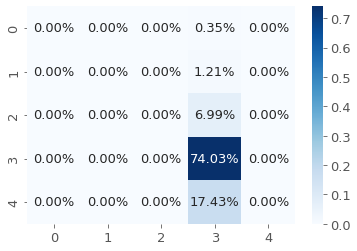

In [249]:
#cmap='Blues'
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues',
            fmt='.2%')

In [250]:
# Evaluation 
accuracy_score(y_test, y_pred)

0.7402933563416738

Définissons une fonction qui va nous retourner la matrice de confusion et l'accuracy pour ne pas détailler toutes ces étapes précédentes en testant aussi d'autres modèles.

In [251]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    y_pred = ml_model.predict(X_test)
    print("Les predictions sont : \n{}".format(y_pred))
    print("\n")
    
    mat_conf = confusion_matrix(y_test, y_pred)
    print("Matrice de confusion: \n{}".format(mat_conf))
    print("\n")
    
    acc = accuracy_score(y_test, y_pred)
    print("Matrice de confusion: \n{}".format(acc))

In [252]:
from sklearn.ensemble import RandomForestClassifier

# Appelle à la fonction
predict(RandomForestClassifier())

Les predictions sont : 
[4 4 4 ... 4 4 4]


Matrice de confusion: 
[[   0    0    1    7    0]
 [   0    3    1   22    2]
 [   0    0   12  148    2]
 [   0    1    6 1656   53]
 [   0    0    1  292  111]]


Matrice de confusion: 
0.7687661777394306


In [257]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.4925898227698349, 0.9848484848484849, 'X[1] <= 0.347\ngini = 0.425\nsamples = 6952\nvalue = [14, 89, 513, 5098, 1238]'),
 Text(0.49196548125502626, 0.9545454545454546, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 0, 409, 0]'),
 Text(0.4932141642846435, 0.9545454545454546, 'X[3] <= 30000.0\ngini = 0.444\nsamples = 6543\nvalue = [14, 89, 513, 4689, 1238]'),
 Text(0.16427942047434713, 0.9242424242424242, 'X[1] <= 1.242\ngini = 0.539\nsamples = 2575\nvalue = [14, 70, 277, 1620, 594]'),
 Text(0.022122663596987554, 0.8939393939393939, 'X[0] <= 4.259\ngini = 0.38\nsamples = 346\nvalue = [9, 2, 12, 266, 57]'),
 Text(0.02149832208217895, 0.8636363636363636, 'X[3] <= 30.0\ngini = 0.375\nsamples = 344\nvalue = [9, 2, 12, 266, 55]'),
 Text(0.008428610449916104, 0.8333333333333334, 'X[2] <= 8.3\ngini = 0.415\nsamples = 103\nvalue = [1, 0, 1, 74, 27]'),
 Text(0.005931244390681703, 0.803030303030303, 'X[2] <= 6.95\ngini = 0.47\nsamples = 59\nvalue = [0, 0, 1, 38, 20]'),
 Text(0.0043703906036602

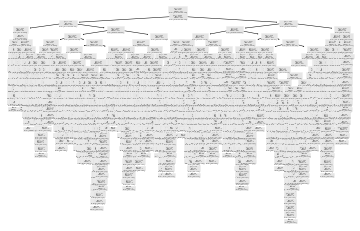

In [254]:
tree.plot_tree(clf)

https://scikit-learn.org/stable/modules/tree.html

In [258]:
# Appelle à la fonction
predict(DecisionTreeClassifier())

Les predictions sont : 
[1 4 4 ... 5 4 4]


Matrice de confusion: 
[[   1    0    1    6    0]
 [   0    3    4   18    3]
 [   0    2   30  100   30]
 [   7   22   97 1351  239]
 [   2    4   21  229  148]]


Matrice de confusion: 
0.6613459879206213
